# Model Auto-naming

This example assumes you've read `advanced.py`, and covers:

  - How to configure automatic model naming

In [1]:
import deeptrain
deeptrain.util.misc.append_examples_dir_to_sys_path()

from utils import make_autoencoder, init_session, AE_CONFIGS as C

DeepTrain auto-names model based on `model_name_configs`, a dict.

  - Keys denote either TrainGenerator attributes, its object's attributes
    (via `.`), or `model_configs` keys. 
     - `'best_key_metric'` reflects the actual value, if `TrainGenerator` checkpointed since last change.
  - Values denote attribute aliases; if blank or None, will use attrs as given.

In [2]:
name_cfg = {'datagen.batch_size': 'BS',
            'filters': 'filt',
            'optimizer': '',
            'lr': '',
            'best_key_metric': '__max'}
C['traingen'].update({'epochs': 1,
                      'model_base_name': "AE",
                      'model_name_configs': name_cfg})
C['model']['optimizer'] = 'Adam'
C['model']['lr'] = 1e-4

In [3]:
tg = init_session(C, make_autoencoder)

Discovered 48 files with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample


Fitting set 1...   Loss = 0.303295 
Fitting set 2...   Loss = 0.301919 
Fitting set 3...   Loss = 0.301043 
Fitting set 4...   Loss = 0.300576 
Fitting set 5...   Loss = 0.300247 
Fitting set 6...   Loss = 0.300119 
Fitting set 7...   Loss = 0.299533 
Fitting set 8...   Loss = 0.299117 
Fitting set 9...   Loss = 0.298494 
Fitting set 10...  Loss = 0.297995 
Fitting set 11...  Loss = 0.297355 
Fitting set 12...  Loss = 0.296885 
Fitting set 13...  Loss = 0.296406 
Fitting set 14...  Loss = 0.295988 
Fitting set 15...  Loss = 0.295545 
Fitting set 16...  Loss = 0.295146 
Fitting set 17...  Loss = 0.294726 
Fitting set 18...  Loss = 0.294205 
Fitting set 19...  Loss = 0.293743 
Fitting set 20...  Loss = 0.293248 
Fitting set 21...  Loss = 0.292782 
Fitting set 22...  Loss = 0.292293 
Fitting set 23...  Loss = 0.291838 
Fitting set 24...  Loss = 0.291419 
Fitting set 25...  Loss = 0.290918 
Fitting set 26...  Loss = 0.290412 
Fitting set 27...  Loss = 0.289942 
Fitting set 28...  Loss = 0

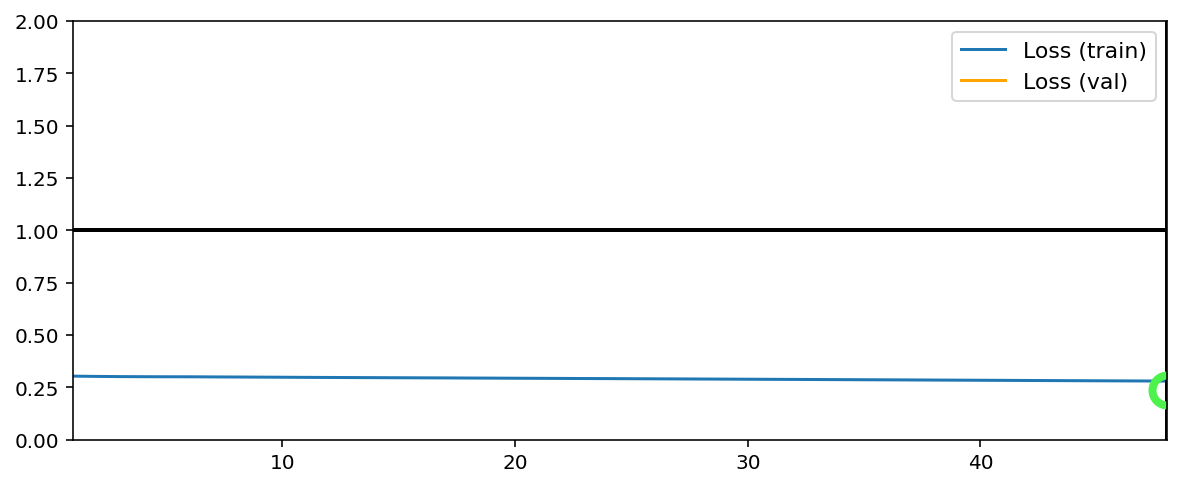

Training has concluded.


In [4]:
tg.train()

In [5]:
print(tg.model_name)

M9__AE-filt6_12_2_6_12-Adam-1e-4__max.238


Note that `logdir` and best model saves are also named with `model_name`; it, together with `model_num`,
enables scalable reference to hundreds of trained models: sort through models by reading off key hyperparameters.

In [6]:
print(tg.logdir)
print(tg.get_last_log('state', best=True))

C:\deeptrain\examples\dir\logs\M9__AE-filt6_12_2_6_12-Adam-1e-4__max999.000
C:\deeptrain\examples\dir\models\M9__AE-filt6_12_2_6_12-Adam-1e-4__max.238__state.h5
